# Problem Statement 
The goal of this project was to predict the daily rental count of bikes in Seoul using various environmental and seasonal attributes. 
This prediction task involves understanding how different factors such as weather conditions, temperature, and holidays affect the demand for bike rentals. 
The dataset used for this analysis is the "Seoul Bike Sharing Demand" dataset.

In [167]:
import pandas as pd

# Data Imported

In [168]:
df = pd.read_csv("C://Users//ASUS//Downloads//SeoulBikeData.csv", encoding='ISO-8859-1')

In [169]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

# Cleaning the dataset

In [170]:
df.drop({'Date'},axis=1,inplace=True)

# Encoding the categorical values

In [171]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()

In [172]:
df['Seasons'] = le.fit_transform(df['Seasons'])
df['Holiday'] = le.fit_transform(df['Holiday'])
df['Functioning Day'] = le.fit_transform(df['Functioning Day'])

# Scaling the continuous variables values

In [173]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [174]:
df['Temperature(°C)']=ss.fit_transform(df[['Temperature(°C)']])
df['Humidity(%)']=ss.fit_transform(df[['Humidity(%)']])
df['Wind speed (m/s)']=ss.fit_transform(df[['Wind speed (m/s)']])
df['Visibility (10m)']=ss.fit_transform(df[['Visibility (10m)']])
df['Dew point temperature(°C)']=ss.fit_transform(df[['Dew point temperature(°C)']])
df['Solar Radiation (MJ/m2)']=ss.fit_transform(df[['Solar Radiation (MJ/m2)']])
df['Rainfall(mm)']=ss.fit_transform(df[['Rainfall(mm)']])
df['Snowfall (cm)']=ss.fit_transform(df[['Snowfall (cm)']])


In [175]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-1.513957,-1.042483,0.458476,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,3,1,1
1,204,1,-1.539074,-0.993370,-0.892561,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,3,1,1
2,173,2,-1.580936,-0.944257,-0.699556,0.925871,-1.667262,-0.655132,-0.1318,-0.171891,3,1,1
3,107,3,-1.597680,-0.895144,-0.796059,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,3,1,1
4,78,4,-1.580936,-1.091596,0.554978,0.925871,-1.736177,-0.655132,-0.1318,-0.171891,3,1,1


 # Dividing the data into Training and Testing Parts

In [176]:
from sklearn.model_selection import train_test_split

In [177]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [178]:
X=df[[ 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day']]
Y=df['Rented Bike Count']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)


In [179]:
X_train.shape

(6132, 12)

In [180]:
X_test.shape

(2628, 12)

# Modelling the data in random forest model

In [181]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [182]:
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [183]:
y_pred = rf.predict(X_test)
y_pred

array([ 990.82,  944.52,  738.94, ...,  179.61, 1095.31,  279.1 ])

In [184]:
Y_test

4136     694
6705    1186
3538     789
6583     511
1993     190
        ... 
1949      79
7547     926
1476     160
8320    1193
910      214
Name: Rented Bike Count, Length: 2628, dtype: int64

# Importing mean_absolute_error, mean_squared_error

In [185]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(Y_test, y_pred)

140.83962709284629

In [186]:
mean_squared_error(Y_test, y_pred)

53906.780365068495

# Importing Feature Importance

In [187]:
import pandas as pd
feature_imp = pd.Series(rf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

Temperature(°C)              0.309047
Hour                         0.283465
Solar Radiation (MJ/m2)      0.095022
Functioning Day              0.084406
Humidity(%)                  0.071063
Rainfall(mm)                 0.046746
Dew point temperature(°C)    0.035096
Seasons                      0.033915
Visibility (10m)             0.019830
Wind speed (m/s)             0.018634
Holiday                      0.002099
Snowfall (cm)                0.000677
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


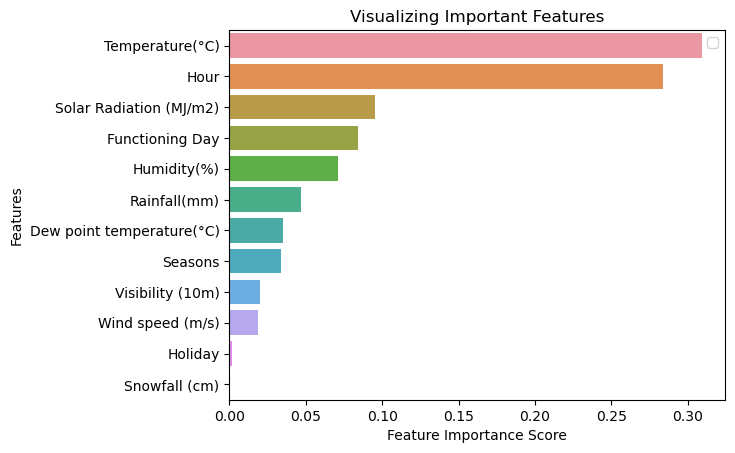

In [188]:
#visualizing feature importance results
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

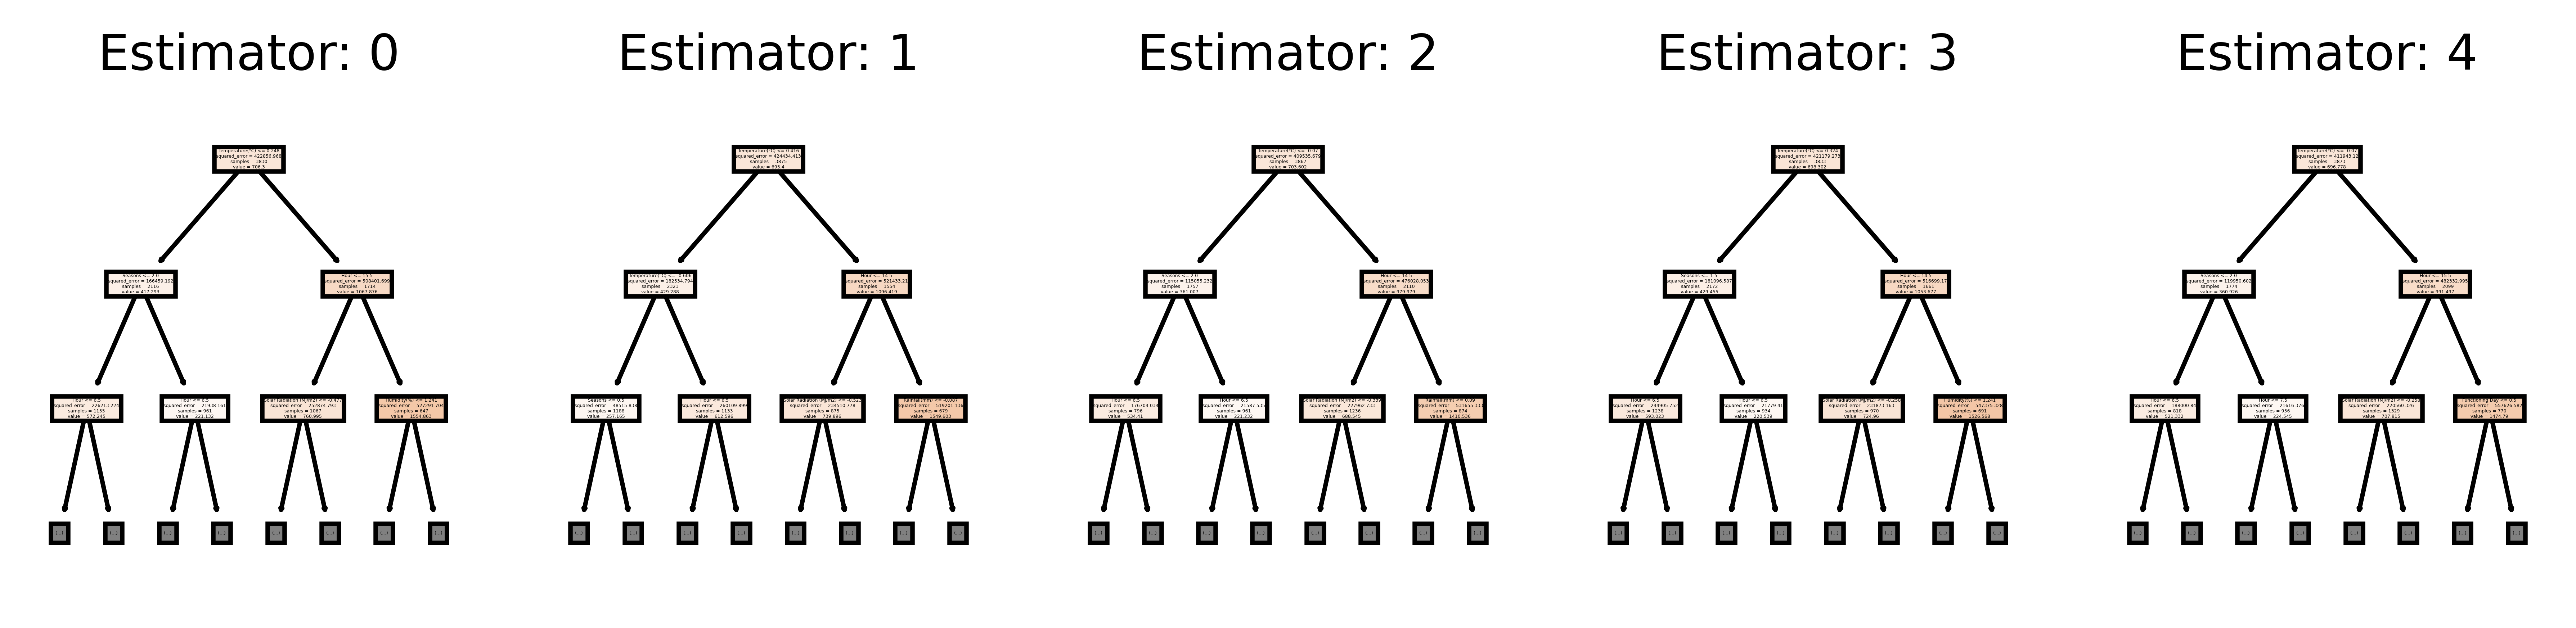

In [189]:
from sklearn.tree import plot_tree
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(rf.estimators_[index],
                   max_depth=2,
                   feature_names = ['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'], 
                   class_names=["0","1","2","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19"],
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

# Importing GradientBoostingRegressor
xgboost 

# Modelling the data in Gradient Boosting

In [190]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [191]:
XGB = XGBRegressor(random_state=25)

In [192]:
XGB.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=25, ...)

In [193]:
y_pred2 = XGB.predict(X_test)

In [194]:
y_pred2

array([ 682.39734, 1163.282  ,  829.5241 , ...,  165.11516, 1112.4061 ,
        313.62024], dtype=float32)

In [195]:
Y_test

4136     694
6705    1186
3538     789
6583     511
1993     190
        ... 
1949      79
7547     926
1476     160
8320    1193
910      214
Name: Rented Bike Count, Length: 2628, dtype: int64

In [196]:
mean_absolute_error(Y_test, y_pred2)

145.56880020929708

In [197]:
mean_squared_error(Y_test, y_pred2)

53293.25442979326

In [198]:
feature_imp = pd.Series(XGB.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

Functioning Day              0.436178
Rainfall(mm)                 0.189614
Hour                         0.093212
Temperature(°C)              0.091706
Seasons                      0.069714
Solar Radiation (MJ/m2)      0.039024
Humidity(%)                  0.029400
Holiday                      0.018945
Dew point temperature(°C)    0.015545
Visibility (10m)             0.006485
Wind speed (m/s)             0.005380
Snowfall (cm)                0.004798
dtype: float32

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


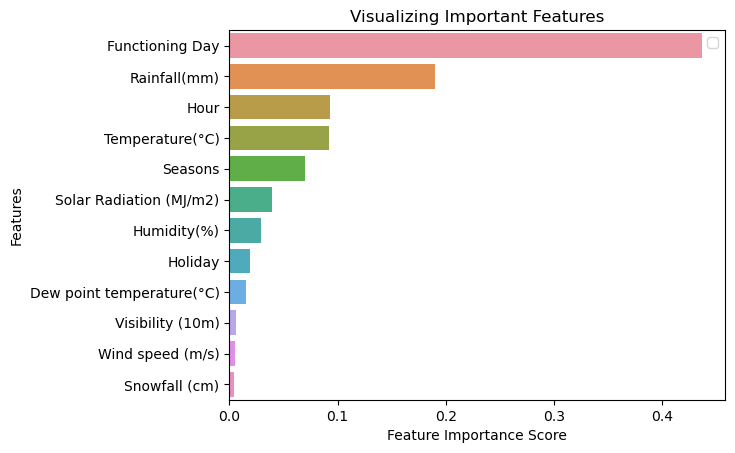

In [199]:
#visualizing feature importance results
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# Modelling the data in KNeighborsRegressor

In [200]:
from sklearn.neighbors import KNeighborsRegressor

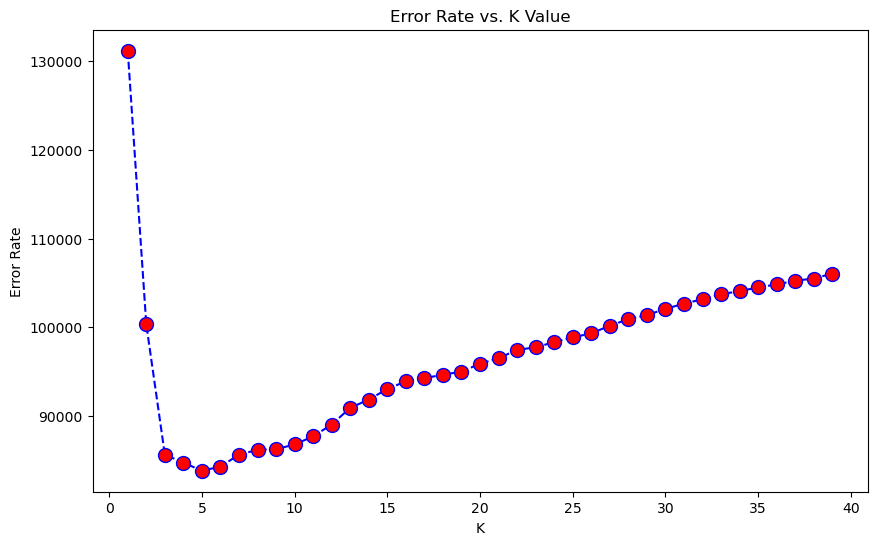

Minimum error:- 83841.61537290717 at K = 5


In [201]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsRegressor(n_neighbors=i)
 knn.fit(X_train,Y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(mean_squared_error(Y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [202]:
knn = KNeighborsRegressor(n_neighbors=5)

In [203]:
knn.fit(X_train,Y_train)

KNeighborsRegressor()

In [204]:
y_pred3 = knn.predict(X_test)

In [205]:
mean_absolute_error(Y_test,y_pred3)

184.18828006088282

In [206]:
mean_squared_error(Y_test, y_pred3)

83841.61537290717

# Using a new record to predict the daily rental count of bikes in Seoul

In [207]:
data = [[9,-6.5,27,0.5,1928,-22.4,0.23,0,0,3,1,1]]

new_data = pd.DataFrame(data, columns=['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'])

In [208]:
new_data

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,9,-6.5,27,0.5,1928,-22.4,0.23,0,0,3,1,1


In [209]:
rf.predict(new_data)

array([257.39])

In [210]:
XGB.predict(new_data)

array([359.24927], dtype=float32)

In [211]:
knn.predict(new_data)

array([191.8])

# Interpretation:

# Random Forest:

Mean Absolute Error (MAE): 140.84
Mean Square Error (MSE): 53906.78
# XGBoost:

Mean Absolute Error (MAE): 145.57
Mean Square Error (MSE): 53293.25
# KNN (K-Nearest Neighbors):

Mean Absolute Error (MAE): 184.19
Mean Square Error (MSE): 83841.62
# Interpretation and Comparison:

Mean Absolute Error (MAE): This metric measures the average magnitude of errors in a set of predictions, where lower values indicate better accuracy. In this case, Random Forest has the lowest MAE (140.84), followed closely by XGBoost (145.57), and KNN has the highest MAE (184.19). Therefore, Random Forest and XGBoost perform better in terms of MAE compared to KNN.

Mean Square Error (MSE): MSE measures the average squared difference between predicted and actual values. Like MAE, lower MSE values indicate better accuracy. Random Forest has MSE of 53906.78, XGBoost has MSE of 53293.25, and KNN has MSE of 83841.62. Again, Random Forest and XGBoost show lower MSE values, indicating better performance than KNN.

# Overall Comparison:

Random Forest vs. XGBoost: Both Random Forest and XGBoost perform similarly in terms of MAE and MSE, with Random Forest having slightly better MAE but XGBoost slightly better MSE. The choice between them might depend on specific application requirements or further tuning.

KNN: KNN shows higher errors (both MAE and MSE) compared to Random Forest and XGBoost, suggesting it might not be as effective for this particular dataset or task.

# Interpretation of new data:


# The predictions for the new data point using the three models (Random Forest, XGBoost, and KNN) are as follows:

Random Forest: Predicts 257.39
XGBoost: Predicts 359.25
KNN: Predicts 191.8
# Interpretation:
These predictions represent the output or target variable for the given input features provided in new_data. The features in the dataset include information like the hour, temperature, humidity, wind speed, visibility, etc. The models predict a value for the target variable (e.g., demand, energy consumption, etc., depending on the context of your problem) based on these features.

# Model Variation:

The models provide quite different predictions for the same input data. XGBoost predicts the highest value (359.25), followed by Random Forest (257.39), and KNN predicts the lowest value (191.8).
This variation indicates that the models are interpreting the relationship between the input features and the target variable differently. It might be useful to explore why such differences occur by examining feature importance, model biases, or the specific strengths of each model.
Model Performance:

Given that Random Forest and XGBoost had similar performance metrics (MAE and MSE) in your earlier results, but XGBoost has a higher prediction here, it suggests that the models might respond differently to this specific input.
KNN, which had the highest error metrics, is predicting a significantly lower value than the other two models. This might align with its generally poorer performance in your earlier analysis.
Use Case Consideration:

Depending on the context of your problem (e.g., whether it’s better to overpredict or underpredict), you may prefer one model's prediction over another. For instance, if overprediction has a lower cost than underprediction, XGBoost's higher prediction might be more appropriate.
# Summary:
Random Forest provides a moderate prediction.
XGBoost predicts a higher value, which might be more sensitive to certain features.
KNN gives a lower prediction, which could be less reliable given its higher overall error rates.